# Application of kNN for Dementia Severity (GDS) Prediction from ACE-III in the Elderly Population.

**Author**
* Juan Bekios Calfa

**Dataset**:
* 14 atributos R0-R5.sav

**Problem**: 

**Method**: The problem has to be decomposed into the following stages.
1. Description of the problem and aims.
2. Data collection.
3. Data processing.
4. Exploration/Visualization.
5. Analysis/Machine Learning.
6. Results.

#Problem

To Build a Knn classifier to test different dataset configurations between input attributes delivered by ACE-III and data labels by different GDS codings.

ACE-III input attributes will be tested using 24 and 15 input features. The dataset are:

*  ff
*  fdf

Each dataset contains different codings of GDS output:

* GDS: 7 classes
* GDS_R1:
* GDS_R2:
* GDS_R3:
* GDS_R4:
* GDS_R5:

# 1. Configuration
 
 Install libraries and necesary dependencies.

In [ ]:
# Load libraries to load spss files
!pip install pyreadstat
# Libraries to read json files with comments
!pip install commentjson
# Load libraries to create word documents
!pip install python-docx
# Load libraries to balance the data
!pip install -U imbalanced-learn

Load standard Python libraries

In [ ]:
# Manipulate json files with comments
import commentjson
# pandas library is imported to read the data as a DataFrame.
import pandas as pd
# Libraries to work with data collections
import collections
# Libraries for plotting graphs
import matplotlib.pyplot as plt
# Libraries for using matrices
import numpy as np

Project Configuration

In [ ]:
# Experiment configuration
base_datos = '15 atributos R0-R5.sav'
numero_atributos_entrada = 15

str_config = f"""{{
  \"archivo\": \"{base_datos}\", //Base de datos ACEII-GDS}}
  \"titulo_experimento\": \"ACEIII-GDS [15 atributos]\",  // Título gráfico
  \"num_atrib_entrada\": {numero_atributos_entrada},  // Número de atributos de entrada
  \"codificacion\": [\"GDS\", \"GDS_R1\", \"GDS_R2\", \"GDS_R3\", \"GDS_R4\", \"GDS_R5\"]  // Distintos tipos de codificaciones GDS
}}
"""

# I get a dictionary with the parameters to load the dataset
config = commentjson.loads(str_config)

# 2. Loading data

Mounting unit with Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd ##PATH where the dataset is located##

In [ ]:
# Reading the data from an SPSS file and storing it in a DataFrame.

# Día = day; mes = month; estación = season; país = country; ciudad = city; calle/lugar = street/place; Numero/piso = number/floor.
df = pd.read_spss(config['archivo'])
df.head()

,ID,Día,Mes,Año,Estación,País,Ciudad,CalleLugar,NumeroPiso,Miguel2,...,Imperial2,A682,Caldera2,Copiapo2,GDS,GDS_R1,GDS_R2,GDS_R3,GDS_R4,GDS_R5
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,3.0,1.0,2.0,1.0,2.0,2.0
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,4.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0
4,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0,2.0


#3. Data processing

Over the original data will be processed:

1. Delete the records that have _missing_ data.
2. Build a _dataframe_ with only the predictor variables or input variables.
3. Build a _dataframe_ with only the output variables.
4. Separate the dataset into training and testing.

### 3.1 Deleting recordings with _missing_ data

In [ ]:
# Number of current rows
num_current = df.shape[0]
# Remove rows with missing values
df_drop = df.dropna(axis=0)
# Calculate the number of remaining rows
num_with_drop = df_drop.shape[0]

# Print current row values vs deleted rows
print(f'Número de filas originales: {num_current}') # number of original rows: 1119
print(f'Número de filas nuevo dataframe: {num_with_drop}') # number of rows new dataframe: 1119
print(f'Número de filas eliminadas: {num_current - num_with_drop}') # number of deleted rows: 0

Número de filas originales: 1119
Número de filas nuevo dataframe: 1119
Número de filas eliminadas: 0


## 3.2 Fix database failures

1.  GDS_R3: Classes 1 and 3, must be 1 and 2.
2.  GDS : Merge all classes 6 and 7 into 6.

In [ ]:
# 1. GDS_R3: Has labels 1 and 3, it must be 1 and 2.
df['GDS_R3'] = np.where(df['GDS_R3'] == 3.0, 2.0, df['GDS_R3'])

# 2. GDS : Merge all classes 6 and 7 into 6.
df['GDS'] = np.where(df['GDS'] == 7.0, 6.0, df['GDS'])

## 3.3 Build a _dataframe_ with only the predictor variables or input variables

The GDS columns, GDS_R1, GDS_R2, and GDS_R3 are different codings of the class variables.

A _dataframe_ will be created with only the predictor variables.


In [ ]:
# Listing output variables
list_var_dependientes = config['codificacion']

# Selecting predictor variables
df_features = df.drop(list_var_dependientes + ['ID'], axis=1)
#df_atributos = df_atributos.drop(['ID'], axis=1)
df_features.head()

# # Día = day; mes = month; año = year; estación = season; país = country; ciudad = city; calle/lugar = street/place; Numero/piso = number/floor; Avenida = Avenue.

,Día,Mes,Año,Estación,País,Ciudad,CalleLugar,NumeroPiso,Miguel2,González2,Avenida2,Imperial2,A682,Caldera2,Copiapo2
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##3.4 Build a _dataframe_ with only the output variables

The GDS columns, GDS_R1, GDS_R2, GDS_R3, etc. they are different codings of class variables.

A _dataframe_ will be created with the different class variables. Each column represents a different type of coding.


In [ ]:
# Creating dataframe with the output variables
df_labels = df[list_var_dependientes]

df_labels.head()

,GDS,GDS_R1,GDS_R2,GDS_R3,GDS_R4,GDS_R5
0,3.0,1.0,2.0,1.0,2.0,2.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,2.0,1.0,1.0,1.0,2.0,2.0
4,2.0,1.0,1.0,1.0,2.0,2.0


### 3.5 Coding GDS


In [ ]:
for cod_gds in config['codificacion']:
  print(f'{cod_gds} Labels: {np.unique(df_labels[cod_gds])}')

GDS Labels: [1. 2. 3. 4. 5. 6.]
GDS_R1 Labels: [1. 2. 3.]
GDS_R2 Labels: [1. 2. 3.]
GDS_R3 Labels: [1. 2.]
GDS_R4 Labels: [1. 2. 3.]
GDS_R5 Labels: [1. 2. 3.]


# 4. Visualization and exploring the data

Number of data per class.

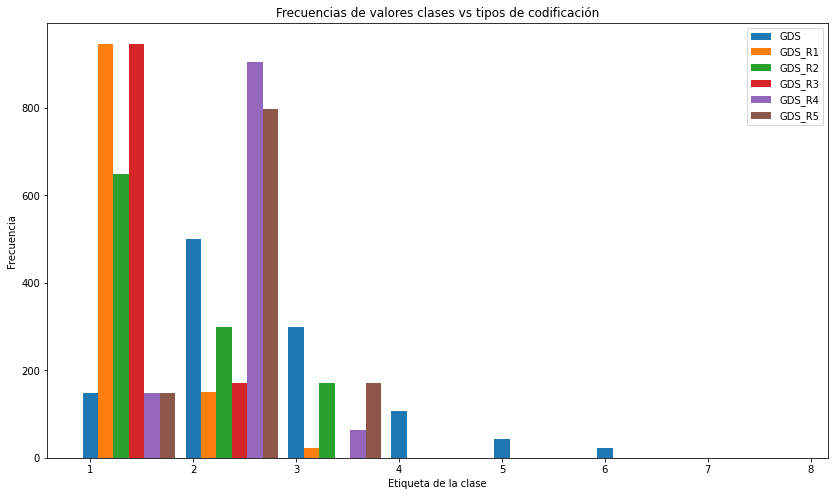

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

experiments = config['codificacion']
width = 0.15
sum_width = 0
plt.figure(figsize=(14, 8))
for exp in experiments:
  ctr = collections.Counter(list(df_labels[exp]))
  data = [ctr[i] for i in range(1,8)]
  plt.bar((np.arange(1, len(data)+1))+sum_width, data, width=width, label=exp)
  sum_width += width

plt.title('Frequencies of values classes and types of coding') 
plt.xlabel('Label of the class')
plt.ylabel('Frequency')
plt.legend()

#5. Creating models

# Testing all codings

In [ ]:
from sklearn.model_selection import train_test_split
import collections
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import pickle
from IPython.display import clear_output
# Separate training and testing set (stratified)
from sklearn.model_selection import train_test_split
#from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import SMOTE 
from copy import deepcopy

# Testing all labels
params = {
    'n_neighbors': list(range(1, 30)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

dict = {}

print(dict)

for codificacion_gds in df_labels.keys():

  X = df_features.to_numpy()
  y = list(df_labels[codificacion_gds].astype('string'))
  print(f"Codificación GDS: {codificacion_gds}")

  # Separate training and testing set (stratified)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)
  # Class elements of each set
  
  # Increasing the data to make it balanced
  sm = SMOTE(random_state=0, n_jobs=-1)
  X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

  ctr_train = collections.Counter(y_train_bal)
  print(f'Frecuencia de los elementos en la lista - Conjunto de entrenamiento: {ctr_train}') # Frequency of items in the list - Training set:
  print(f'Cantidad total de elementos del conjunto de entrenamieto: {len(y_train_bal)}') # Total number of elements in the training set
  print()

  ctr_test = collections.Counter(y_test)
  print(f'Frecuencia de los elementos en la lista - Conjunto de pruebas: {ctr_test}') # Frequency of List Items - set test
  print(f'Cantidad total de elementos del conjunto de pruebas: {len(y_test)}') # Total number of items in the set test

  loo = LeaveOneOut()
  knn = KNeighborsClassifier()

  clf = GridSearchCV(estimator=knn, param_grid=params, cv=loo, scoring=scoring, refit='precision', verbose=0, return_train_score=False)
  clf.fit(X_train_bal, y_train_bal)

  dict[codificacion_gds] = (deepcopy(clf), ctr_train, len(y_train_bal), ctr_test, len(y_test))
  clear_output()
  print(dict)

  print("="*50)
  print(clf.best_score_)
  print(clf.best_params_)
  print("="*50)

with open('saved_det_con_balance-15att.pkl', 'wb') as f:
  pickle.dump(dict, f)

In [ ]:
from sklearn.metrics import classification_report
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
 
with open('saved_det_con_balance-15att.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

print(loaded_dict)

def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
 
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(12, 8))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'}, fmt='g') # or d
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
 
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

for codificacion_gds in df_labels.keys():
  X = df_features.to_numpy()
  y = list(df_labels[codificacion_gds].astype('string'))
  print(f"Codificación GDS: {codificacion_gds}")

  # Separate training and testing set (stratified)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=0)

  # Class elements of each set
  print("="*50)
  print(f'Codificación GDS: {codificacion_gds}') # Coding GDS
  print(f'Mejor puntuación: {loaded_dict[codificacion_gds][0].best_score_}') # best score
  print(f'Mejores hiperparámetors: {loaded_dict[codificacion_gds][0].best_params_}') # best hyperparameters
  print(f'Frecuencia conjunto de entrenamiento: {loaded_dict[codificacion_gds][1]}') # Training set frequency
  print(f'Cantidad de elementos conjunto de entrenamiento: {loaded_dict[codificacion_gds][2]}') # Number of training set elements
  print(f'Frecuencia conjunto de pruebas: {loaded_dict[codificacion_gds][3]}') # test set frequency
  print(f'Cantidad de elementos : {loaded_dict[codificacion_gds][4]}') # Number of items
  
  clf = loaded_dict[codificacion_gds][0]
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred, target_names=clf.classes_))
  print()

  output_filename = f'confusion-matrix-con-balance-precision-{codificacion_gds}.png'
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  plot_confusion_matrix(cm, clf.classes_, output_filename)

  print("="*50) 